<a href="https://colab.research.google.com/github/denisecammarota/matbio/blob/master/tp3/P3_Ej1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 3 - Ejercicio 1**: *Distribución binomial*
***Matemática de los Sistemas Biológicos - 2021***

**Alumna**: Denise S. Cammarota

Link a este Notebook en Google Colaboratory: https://colab.research.google.com/drive/1hGPkwaVYjdCslIKCgox_omdsGcz6tg_n?usp=sharing

In [1]:
#@title 
#importo librerías que me van a ser útiles en hacer las simulaciones
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import pylab
import scipy, scipy.stats
plt.style.use('seaborn')

Consideraremos una población de individuos que no se reproducen, y que evolucionan en tiempo discreto. A cada paso de tiempo, cada uno de ellos puede morir con probabilidad $d$. 

### Cálculo de la distribución de probabilidad 

Primero, nos piden calcular numéricamente la distrubución de probabilidad de la población $P(x,t)$, para algunos valores de $t$ y de la probabilidad $d$. 

In [2]:
#@title 
def time_evolution(n,d,tf):
  #inicializo el vector para la poblacion x(t) desde t=0 hasta t=tf
  x = np.zeros(shape=tf+1,dtype=int)
  #inicialmente, hay n individuos
  x[0] = n 
  #pasos iteración temporal
  for i in range(tf):
    #pasos iteración en individuos, veo si se mueren o no
    x[i+1] = np.copy(x[i]) #inicialmente, tiene igual que el paso anterior
    for j in range(x[i]):
      #genero un número random
      n_random = random.random()
      if (n_random <= d): #si el número es <=d
        x[i+1] = x[i+1] - 1 #entonces el individuo muere
  return x

Como ejemplo, para una población de 1000 individuos, corremos una simulación desde $t=0$ hasta $t_f = 50$ con $d = 0.25$. Tras esto, dibujamos la distribución resultante a $t=10$ a modo de ejemplo de lo que estamos haciendo. 

In [3]:
#@title 
N = 1000 #tamaño de la población, lo dejo fijo en 1000 individuos
d = 0.25 #valores de d que utilizamos
tf = 50 #tiempo final de la simulación 
rep = 10000 #cantidad de simulaciones independientes que haremos
pop = np.zeros(shape=(rep,tf+1)) #donde guardaremos las simulaciones
                                 #hay rep filas, cada una corresponde a una simulación
                                 #hay tf+1 columnas, que corresponden a los pasos temporales
#hacemos las repeticiones y guardamos los resultados en la matriz rep, para un 
for i in range(rep):
  pop[i,:] = time_evolution(N,d,tf)

Distribución de probabilidad P(n,t) para d= 0.25y t = 10


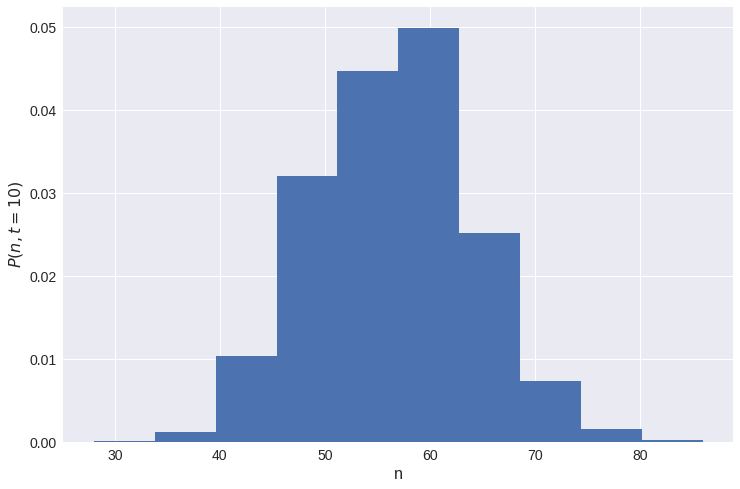

In [6]:
#@title 
plt.figure(figsize=(12,8))
print('Distribución de probabilidad P(n,t) para d= '+str(d)+'y t = 10')
plt.hist(pop[:,10],density=True)
plt.xlabel('n',fontsize=16)
plt.ylabel('$P(n,t=10)$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Ahora, lo hacemos para varios valores de $d = {0,0.25,0.5,0.75,1}$ y diferentes valores de $t_f = 0, 10, 20, 30, 40, 50$. Para ello, definimos un valor de $d$, y calculamos la P(x,t) para los tiempos mendionados, a partir de realizar $10000$ repeticiones de la dinámica que queremos modelar. Luego, cambiamos la probabilidad $d$ y repetimos este proceso. Para cada distribución, calculamos e imprimimos la media y la desviación estándar correspondientes junto a la misma. 

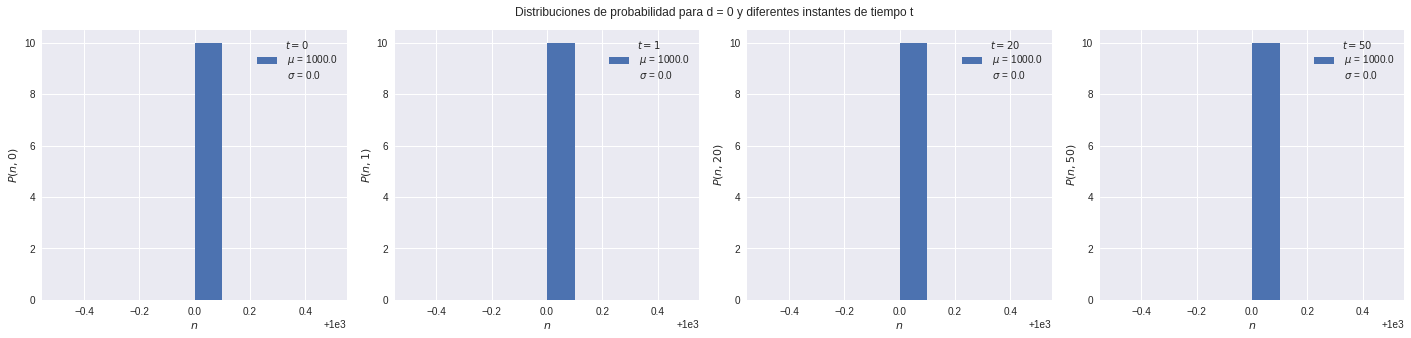

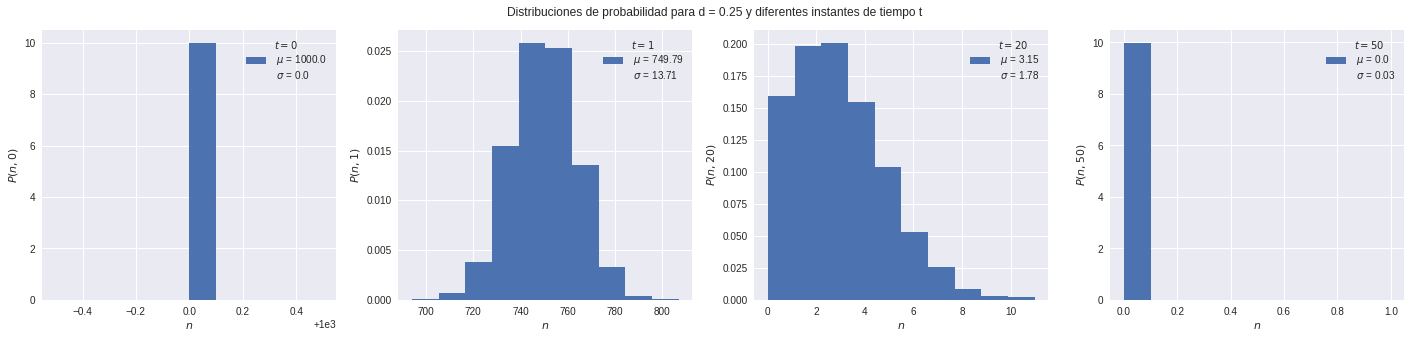

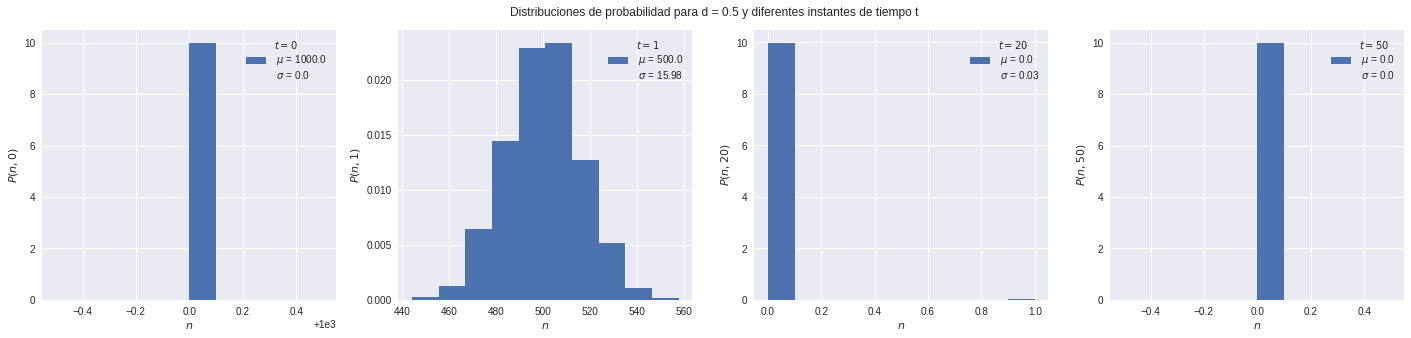

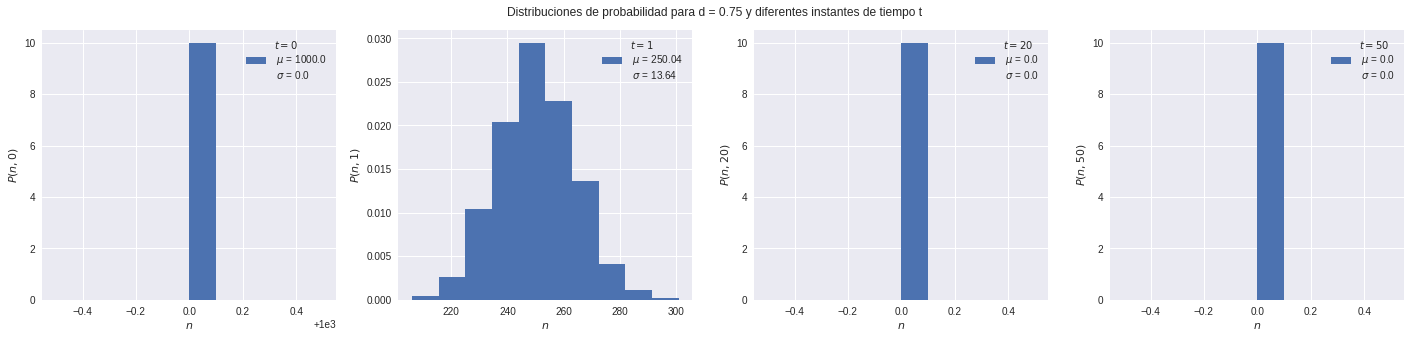

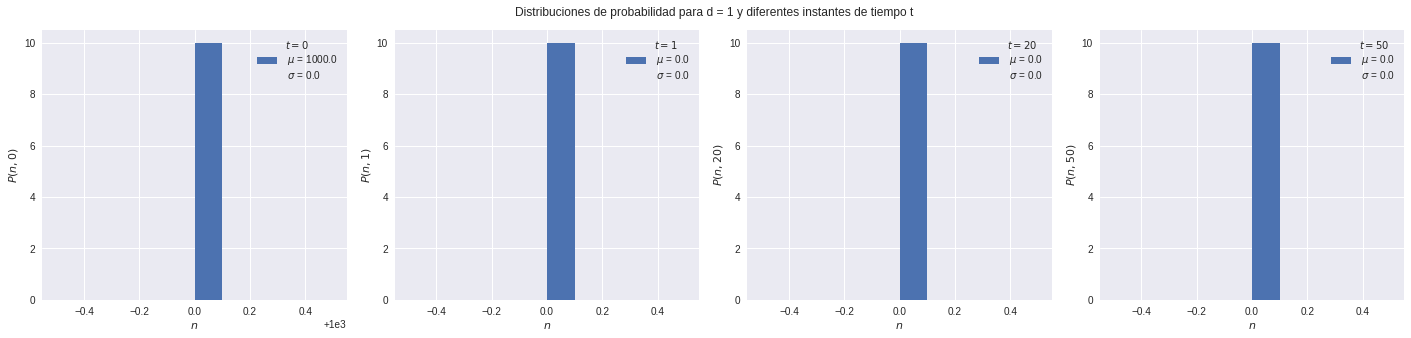

In [ ]:
#@title 
d = [0,0.25,0.5,0.75,1]
tf = 50
N = 1000
rep = 10000
for j in d:
  pop = np.zeros(shape=(rep,tf+1))
  for i in range(rep):
    pop[i,:] = time_evolution(N,j,tf)
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
  fig.suptitle('Distribuciones de probabilidad para d = '+str(j)+' y diferentes instantes de tiempo t')
  ax1.hist(pop[:,0],density=True,label='$t = 0$  \n $\mu$ = '+str(round(np.mean(pop[:,0]),2))+'\n $\sigma$ = '+str(round(np.std(pop[:,0]),2)))
  ax2.hist(pop[:,1],density=True,label='$t = 1$ \n $\mu$ = '+str(round(np.mean(pop[:,1]),2))+'\n $\sigma$ = '+str(round(np.std(pop[:,1]),2)))
  ax3.hist(pop[:,20],density=True,label='$t = 20$ \n $\mu$ = '+str(round(np.mean(pop[:,20]),2))+'\n $\sigma$ = '+str(round(np.std(pop[:,20]),2)))
  ax4.hist(pop[:,50],density=True,label='$t = 50$ \n $\mu$ = '+str(round(np.mean(pop[:,50]),2))+'\n $\sigma$ = '+str(round(np.std(pop[:,50]),2)))
  fig.tight_layout(pad=3.0)
  ax1.legend()
  ax2.legend()
  ax3.legend()
  ax4.legend()
  ax1.set_xlabel('$n$')
  ax2.set_xlabel('$n$')
  ax3.set_xlabel('$n$')
  ax4.set_xlabel('$n$')
  ax1.set_ylabel('$P(n,0)$')
  ax2.set_ylabel('$P(n,1)$')
  ax3.set_ylabel('$P(n,20)$')
  ax4.set_ylabel('$P(n,50)$')

Observaciones de lo anterior son:
- A $t=0$, como corresponde, las distribuciones corresponden a deltas centradas en el número de individuos inicial de la población para todos los valores de $d$.
- A $t=1$, se observa que la distribución de probabilidad se asemeja (por lo menos de la simple inspección) a una **distribución binomial**, como es esperable. Lo mismo no sucede para otros tiempos, sino que la forma de la distribución va cambiando hasta que la especie se extingue por la inexistencia de nuevos nacimientos. 
- Por ello, para $t=50$ observamos que la población está completamente (o casi completamente) extinta.
- A tiempos intermedios entre $t=0$ y $t_f$, se observa que hay más individuos en la población cuando los valores de $d$ son menores. Esto es esperable, al ser $d$ la probilidad que tiene un individuo de morir en un paso de la simulación. Si esta es menor, tiene sentido que más tiempo transcurra hasta la extinción de una especie. 


### Comparación con la distribución binomial

Deberíamos, con el esquema utilizado, observar una distribución binomial como distribución de probabilidad después del primer paso de la simulación. Observamos esto para un valor fijo de la población y varios valores de $d$. Por un lado, podemos superponer la distribución calculada computacionalmente con la analítica. Adicionalmente, podemos compararlas con sus valores de media y varianza.

Recordamos que la distribución binomial tiene la forma:

$P(m,k,p) = {m \choose k} p^k (1-p)^{m-k}$,

donde $m$ es la cantidad de veces que se muestrea la probabilidad aleatoria, $k$ es la cantidad de éxitos o veces que se obtiene un resultado determinado, y $p$ es la probabilidad de éxito. En este caso, por como se escribe el enunciado, $p=1-d$, considerando como éxito la supervivencia de individuos de una población.

De esta distribución, sabemos que su valor medio $\mu$ y su desviación estándar $\sigma$ están dados por:

$\mu = m p$, 

y 

$\sigma = m p (1-p)$.

En términos de la nomenclatura de este problema, estos dos valores pueden expresarse como:

$\mu = N (1-d)$

y

$\sigma = N d (1-d)$.

Para realizar la comparación, dibujamos la distribución de probabilidad tras el primer paso y la distribución binomial correspondiente a la cantidad de individuos y la probabilidad de supervivencia $1-d$. También, imprimimos por consola el valor medio y la desviación estándard, tanto de la distribución calculada como de la binomial. En consecuencia, observamos que la distribución resultante de este proceso es una binomial, como esperado. 

Valor de d= 0.25
Datos de la distribución calculada:
Valor Medio =  749.92  -  Para la binomial el valor medio = 750.0
Desviación Estándar =  13.51   - Para la binomial la desviación estándar = 13.69


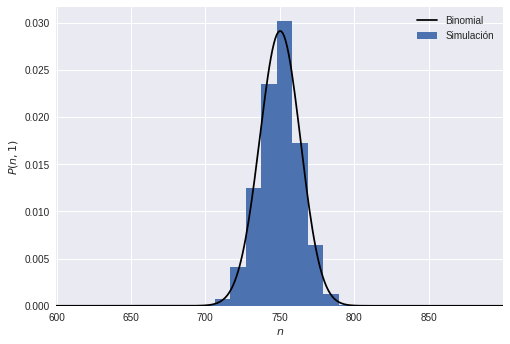



Valor de d= 0.5
Datos de la distribución calculada:
Valor Medio =  500.1  -  Para la binomial el valor medio = 500.0
Desviación Estándar =  15.8   - Para la binomial la desviación estándar = 15.81


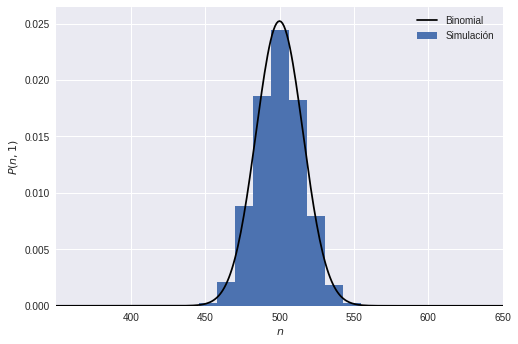



Valor de d= 0.75
Datos de la distribución calculada:
Valor Medio =  249.93  -  Para la binomial el valor medio = 250.0
Desviación Estándar =  13.65   - Para la binomial la desviación estándar = 13.69


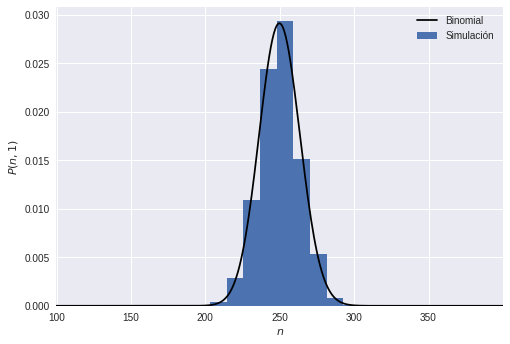

In [ ]:
#@title 
d = [0.25,0.5,0.75]
tf = 1
N = 1000
rep = 10000
for j in d:
  pop = np.zeros(shape=(rep,tf+1))
  for i in range(rep):
    pop[i,:] = time_evolution(N,j,tf)
  plt.hist(pop[:,1],density=True,label='Simulación')
  mean_pop = np.mean(pop[:,1])
  std_pop = np.std(pop[:,1])
  #imprimo por consola todas las estadisticas
  print('Valor de d=',j)
  print('Datos de la distribución calculada:')
  print('Valor Medio = ',round(mean_pop,2),' -  Para la binomial el valor medio =',round(N*(1-j),2))
  print('Desviación Estándar = ',round(std_pop,2),'  - Para la binomial la desviación estándar =',round(np.sqrt(N*j*(1-j)),2))
  #y aca hacemos los gráficos correspondientes
  x = np.linspace(0,1000,1001)
  pmf = scipy.stats.binom.pmf(x,1000,1-j)
  plt.plot(x,pmf,'k',label='Binomial')
  plt.xlabel('$n$')
  plt.ylabel('$P(n,1)$')
  plt.xlim((mean_pop-150,mean_pop+150))
  plt.legend()
  plt.show()
  print('\n')
